<a href="https://colab.research.google.com/github/Edersao/Curso_Data_Scientist/blob/main/exploracion_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

el indicador de esperanza de vida al nacer, de los hombres, por país, desde 1960. Los valores indican la cantidad de años que viviría un recién nacido si los patrones de mortalidad prevalecientes en el momento de su nacimiento fueran los mismos a lo largo de su vida. Dicha información está almacenada en el dataframe lifexp_male:

In [3]:
lifexp_male=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datos/visualizacion/LifeExpectancyMale.csv')
lifexp_male.head()
metadata=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datos/visualizacion/1698423984078-Metadata.csv')

Gráficando un histograma con la expectativa de vida del año 2019, usando diferentes plataformas:

(array([ 5.,  5., 15., 23., 19., 39., 40., 41., 26., 31.]),
 array([51.081 , 54.1929, 57.3048, 60.4167, 63.5286, 66.6405, 69.7524,
        72.8643, 75.9762, 79.0881, 82.2   ]),
 <BarContainer object of 10 artists>)

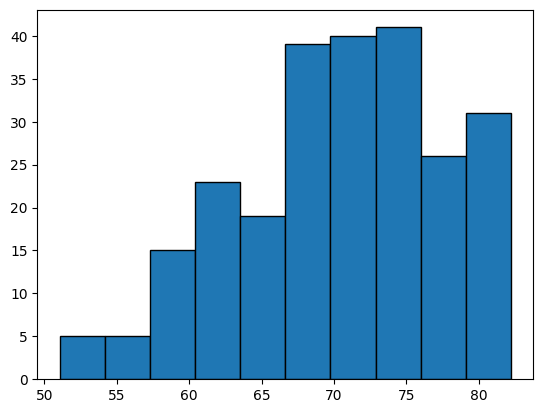

In [4]:
# con matplotlib
#plt.hist(lifexp_male['2019'])
#o
plt.hist('2019',data=lifexp_male,edgecolor='black')

<Axes: ylabel='Frequency'>

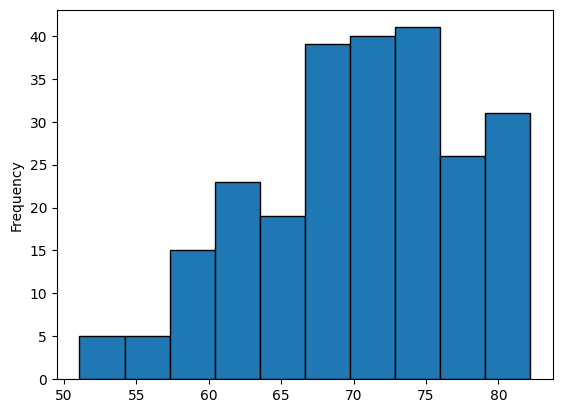

In [5]:
#con Pandas
lifexp_male['2019'].plot.hist(edgecolor='black')
#o
#lifexp_male['2019'].plot(kind='hist')

<Axes: xlabel='2019', ylabel='Count'>

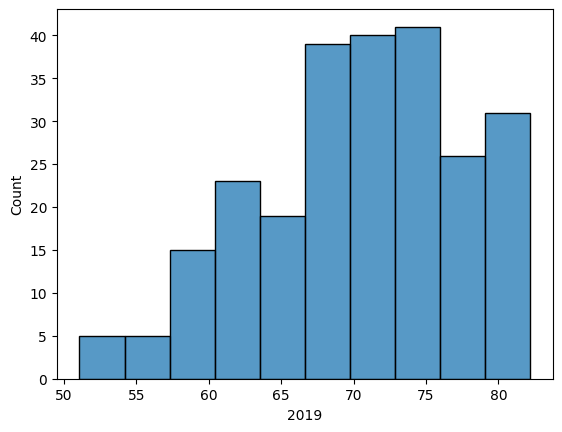

In [6]:
#con Seaborn
sns.histplot(x=lifexp_male['2019'])
#o
#sns.histplot(x='2019',data=lifexp_male)
##o
#sns.displot(kind='hist',x='2019',data=lifexp_male)
#Para eliminar las líneas de contorno se emplea el parámetro element='step'

Las clases dentro de los histogramas se pueden modifiacar con el parámetro: **bins=**, tanto de clases igualmente espaciadas como de clases espacialmente de manera irregular.

In [7]:
# bins =5

(array([10., 38., 58., 81., 57.]),
 array([51.081 , 57.3048, 63.5286, 69.7524, 75.9762, 82.2   ]),
 <BarContainer object of 5 artists>)

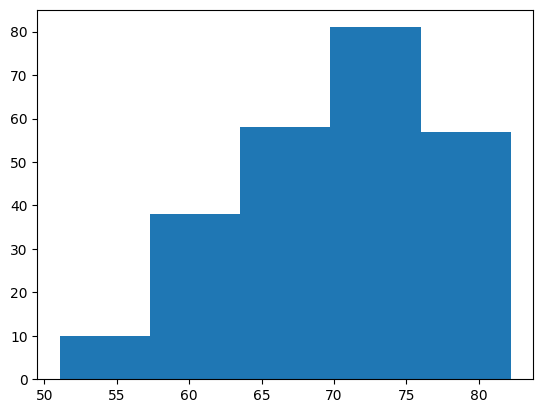

In [8]:
plt.hist('2019',data=lifexp_male,bins=5)

<Axes: ylabel='Frequency'>

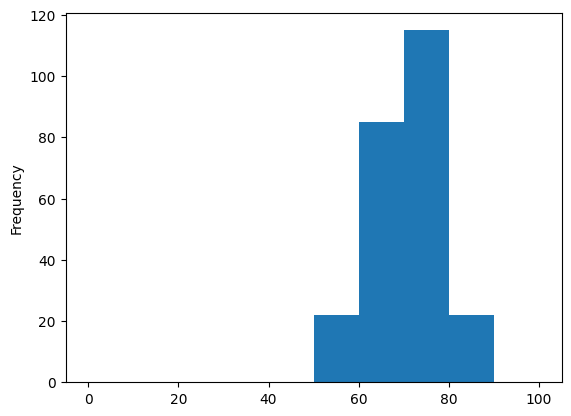

In [9]:
# especificando secuneca que defianna los bordes de las clases
lifexp_male['2019'].plot(kind='hist',bins=[0,10,20,30,40,50,60,70,80,90,100])

Las clases de este histograma van de [0,10), [10,20), [20,30), y así sucesivamente. El histograma obtenido muestra que la expectativa de vida en la mayoría de los países está entre los 70 y 80 años

Otros parámetros de utilidad: **range/binrange** y **cumulative**

(array([16., 12., 13., 16., 28., 30., 25., 25., 18., 19.]),
 array([60., 62., 64., 66., 68., 70., 72., 74., 76., 78., 80.]),
 <BarContainer object of 10 artists>)

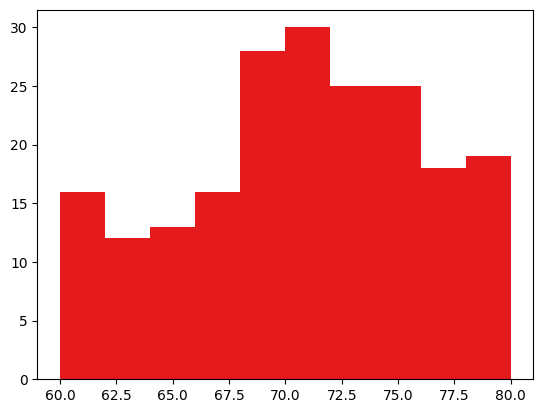

In [10]:
sns.set_palette('Set1')
plt.hist('2019',data=lifexp_male,range=(60,80))
#Establece el límite inferior y superior a considerar.
#Los valores fuera de este rango se ignoran

<Axes: ylabel='Frequency'>

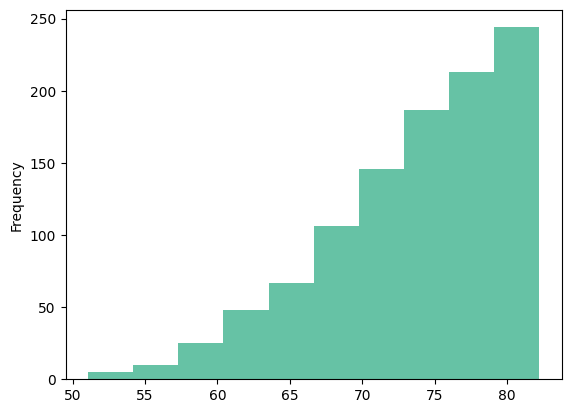

In [11]:
#cumulative aplica en las tres
sns.set_palette('Set2')
lifexp_male['2019'].plot(kind='hist',cumulative=True)

# Varios histogramas en la misma figura
Ahora vamos a comparar el año 1960 y 2019

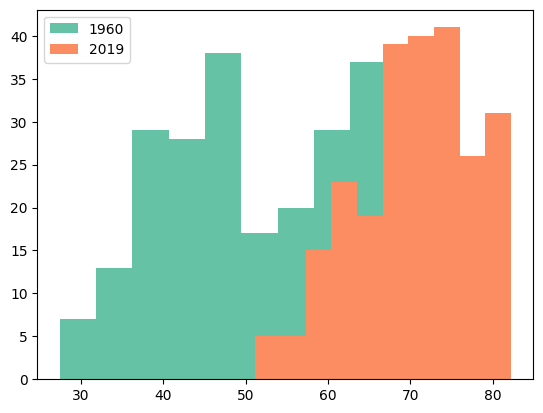

In [12]:
plt.hist('1960',data=lifexp_male,label='1960')
plt.hist('2019',data=lifexp_male,label='2019')
plt.legend()

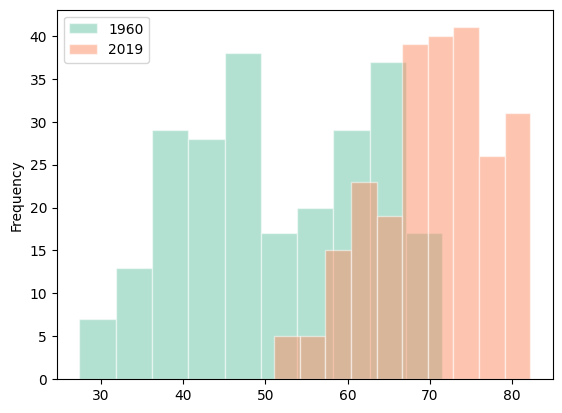

In [13]:
# con Pandas
lifexp_male['1960'].plot.hist(label='1960',alpha=0.5,edgecolor='white')
#r=[lifexp_male['2019'].min()]
#[r.append(r[i-1]+3.1119) for i in range(1,10)]
#plt.xticks(r)
lifexp_male['2019'].plot.hist(label='2019',alpha=0.5,edgecolor='white')
#t=[lifexp_male['2019'].min()]
#[t.append(t[i-1]+3.1119) for i in range(1,10)]
#plt.xticks(t)
plt.legend()

<Axes: ylabel='Frequency'>

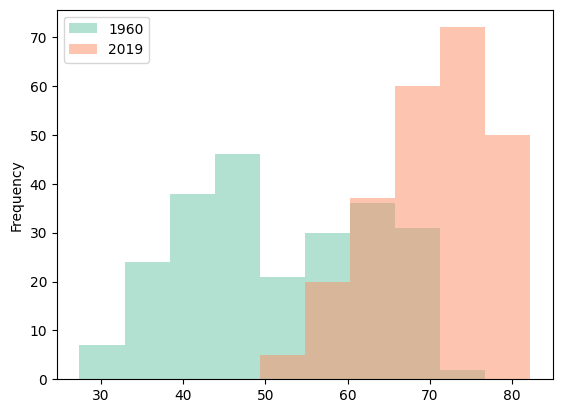

In [14]:
lifexp_male[['1960','2019']].plot.hist(alpha=0.5)

como se puede ver en ambas gráficas de los histogramas  creadas con Pandas, hay diferencias significantes respecto a su Frecuencias

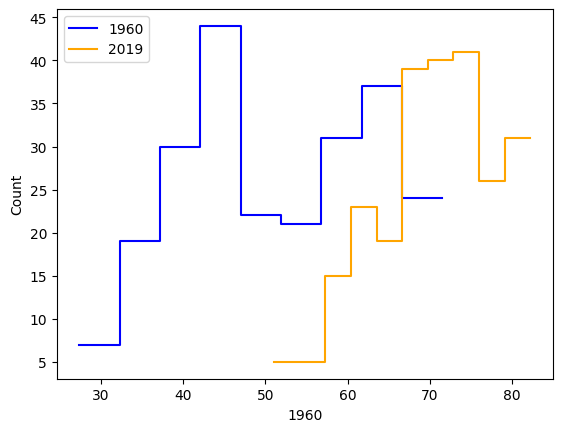

In [15]:
# con Seaborn
sns.histplot(x='1960',data=lifexp_male,color='blue',label='1960',element='step',fill=False)
sns.histplot(x='2019',data=lifexp_male,color='orange',label='2019',element='step',fill=False)
plt.legend()

## Columnas con grupos separados
si se combina el dataframe lifexp_male con el contenido del archivo Metadata.csv, leído en un dataframe con el mismo nombre (metadata), cada país en el indicador estaría asociado a una región (Region) y a un grupo de ingresos (IncomeGroup).

In [16]:
merged_df = lifexp_male.merge(metadata,on='Country Code')

In [17]:
merged_df.head()

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2014,2015,2016,2017,2018,2019,Region,IncomeGroup,SpecialNotes,TableName
0,Aruba,ABW,64.084,64.429,64.747,65.053,65.356,65.660,65.959,66.242,...,73.069,73.208,73.348,73.488,73.628,73.768,Latin America & Caribbean,High income,NaN,Aruba
1,Afghanistan,AFG,31.718,32.224,32.724,33.216,33.700,34.180,34.656,35.133,...,61.563,61.965,62.343,62.701,63.047,63.382,South Asia,Low income,NaN,Afghanistan
2,Angola,AGO,36.305,36.582,36.874,37.181,37.501,37.833,38.177,38.532,...,56.140,56.737,57.242,57.677,58.064,58.416,Sub-Saharan Africa,Lower middle income,NaN,Angola
3,Albania,ALB,61.309,62.272,63.117,63.811,64.346,64.723,64.962,65.116,...,75.734,76.066,76.353,76.601,76.816,77.002,Europe & Central Asia,Upper middle income,NaN,Albania
4,Andorra,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Europe & Central Asia,High income,NaN,Andorra


sería interesante conocer la distribución del indicador por grupo de ingresos

array([[<Axes: title={'center': 'High income'}>,
        <Axes: title={'center': 'Low income'}>],
       [<Axes: title={'center': 'Lower middle income'}>,
        <Axes: title={'center': 'Upper middle income'}>]], dtype=object)

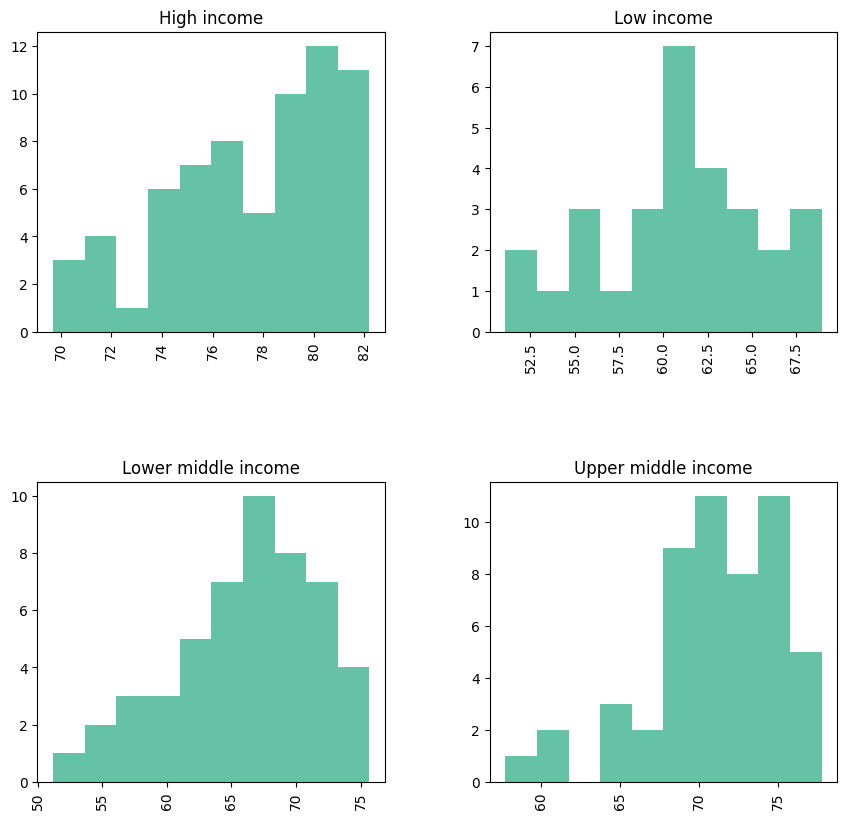

In [18]:
merged_df['2019'].hist(by=merged_df['IncomeGroup'],figsize=(10,10))

también se puede hacer con Seabor, solo que los da en un mismo grafico:

<Axes: xlabel='2019', ylabel='Count'>

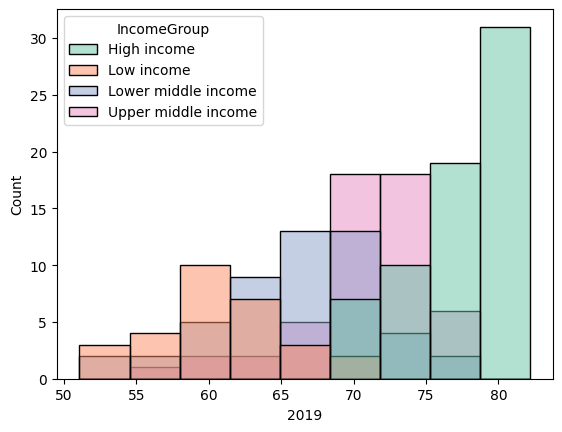

In [19]:
sns.histplot(x='2019',data=merged_df,hue='IncomeGroup')

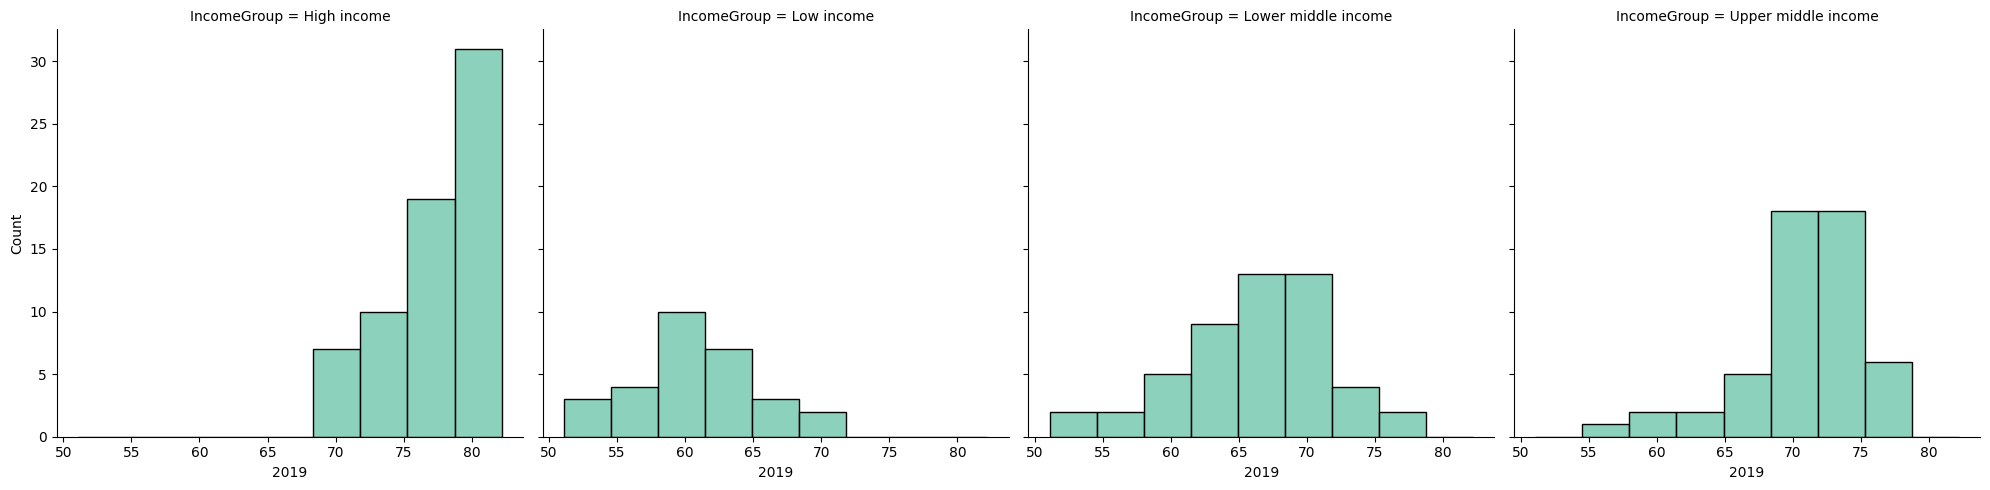

In [20]:
#si las queremos separadas
sns.displot(kind='hist',x='2019',col='IncomeGroup',data=merged_df)

# Boxplot
Gráficando bloxplot  de la expectativa de vida del año 2019:

{'whiskers': [<matplotlib.lines.Line2D at 0x7e1e3350e950>,
 'caps': [<matplotlib.lines.Line2D at 0x7e1e3350ee90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7e1e3350e6b0>],
 'medians': [<matplotlib.lines.Line2D at 0x7e1e3350f3d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7e1e3350f670>],
 'means': []}

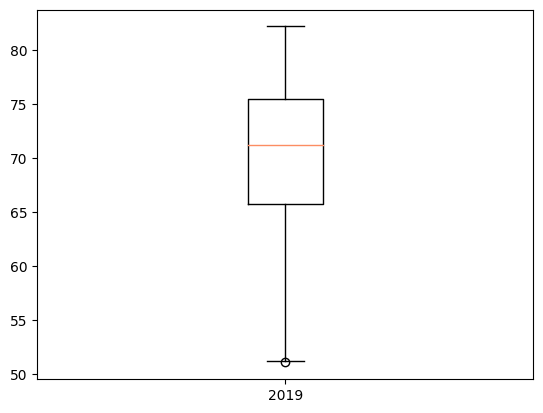

In [21]:
# con Matplotlib
# es necesario eliminar los valores varíos, ya que, el gráfico no se dibujaria.
#Pandas y Seaborn lo hacen automáticamente
plt.boxplot(lifexp_male['2019'].dropna(),labels=['2019'])
#La versión con data no muestra los valores atípico.
#Para girar el diagrama emplea el parámetro vert=False.

<Axes: >

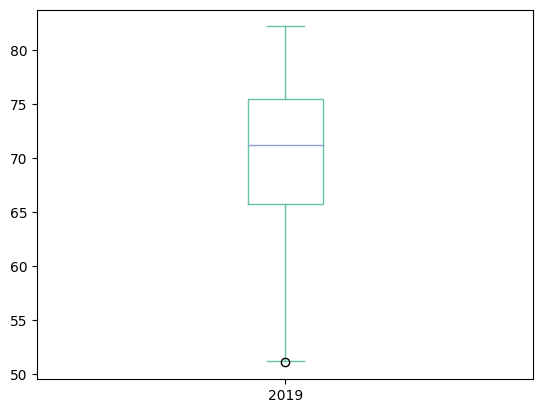

In [22]:
#Pandas
lifexp_male['2019'].plot(kind='box')
#o
#lifexp_male['2019'].plot.box()
#Para girar el diagrama emplea el parámetro vert=False.

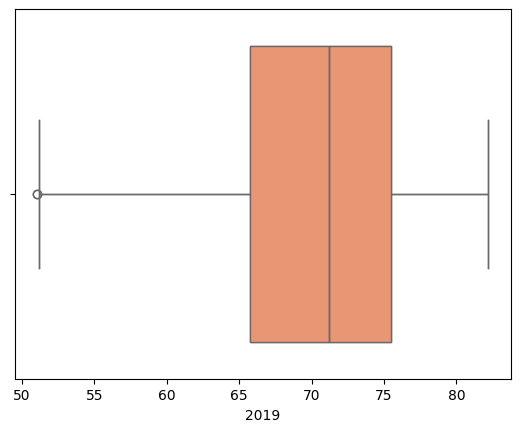

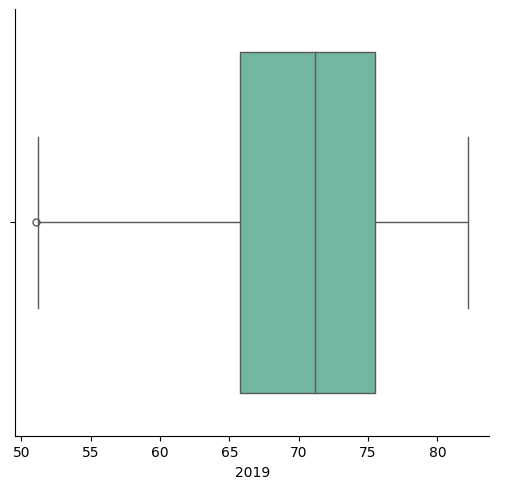

In [23]:
# con Seaborn
sns.boxplot(x='2019',data=lifexp_male)
#o
sns.boxplot(x=lifexp_male['2019'])
#o
sns.catplot(kind='box',x='2019',data=lifexp_male)
#*Para girar el diagrama emplea el parámetro orient='h' y cambia la variable x por y.

compararemos el índice de esperanza de vida de 1960 y 2019:

{'whiskers': [<matplotlib.lines.Line2D at 0x7e1e32fa2b30>,
 'caps': [<matplotlib.lines.Line2D at 0x7e1e32fa3070>,
 'boxes': [<matplotlib.lines.Line2D at 0x7e1e32fa2890>,
 'medians': [<matplotlib.lines.Line2D at 0x7e1e32fa35b0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7e1e32fa3850>,
 'means': []}

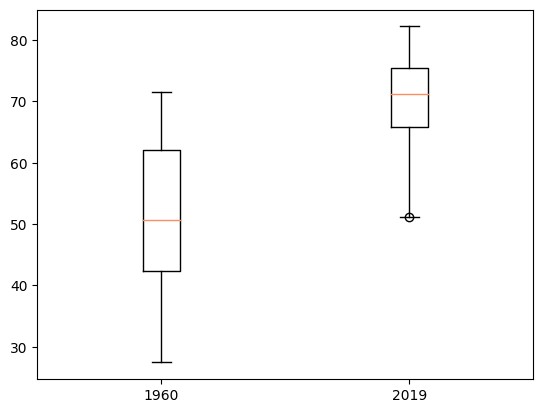

In [24]:
plt.boxplot(x=[lifexp_male['1960'].dropna(),lifexp_male['2019'].dropna()],labels=['1960','2019'])

<Axes: >

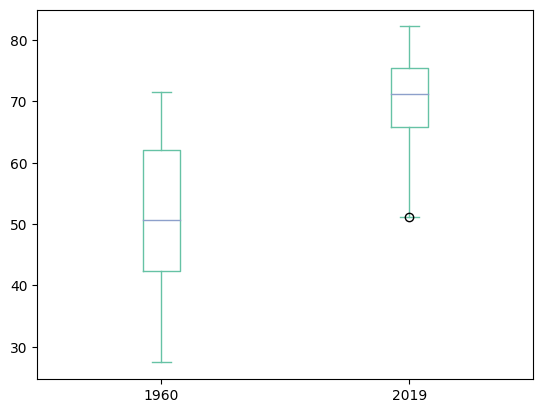

In [25]:
lifexp_male[['1960','2019']].plot.box()


<Axes: xlabel='variable', ylabel='value'>

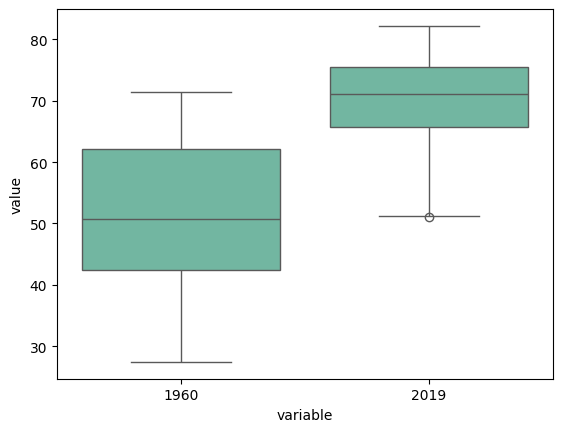

In [26]:
sns.boxplot(x='variable',y='value',data=pd.melt(lifexp_male.loc[:,['1960','2019']]))
#Es necesario desestructurar el dataframe usando la función melt().
#De esta forma se obtienen dos columnas: una de valores (value) que contendrá el indicadores
#de expectativa de vida de todos los países para ambos años, y otra de variables (variable)
#que contendrá las etiquetas de las columnas, en este caso, los años 1960 y 2019

Usando el datafreame metadata, que combina el indicador de expectativa de vida, por país, con la región y el grupo de ingresos, se podría obtener un boxplot por región:

<Axes: title={'center': '2019'}, xlabel='Region'>

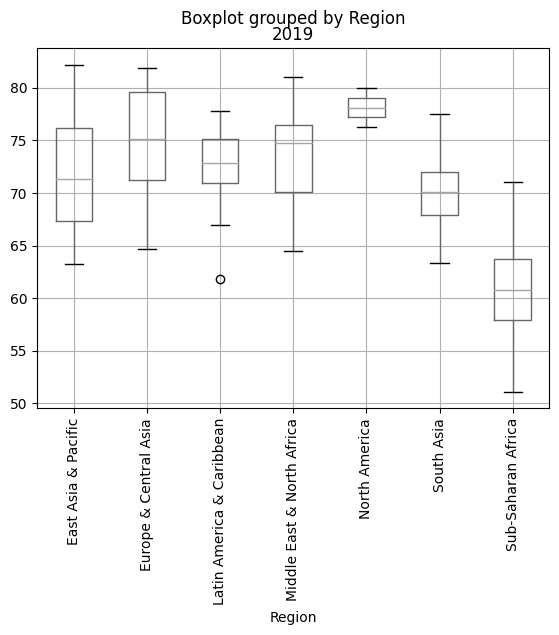

In [27]:
merged_df.boxplot(column=['2019'],by='Region',rot=90)

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Latin America & Caribbean'),
  Text(1, 0, 'South Asia'),
  Text(2, 0, 'Sub-Saharan Africa'),
  Text(3, 0, 'Europe & Central Asia'),
  Text(4, 0, 'Middle East & North Africa'),
  Text(5, 0, 'East Asia & Pacific'),
  Text(6, 0, 'North America')])

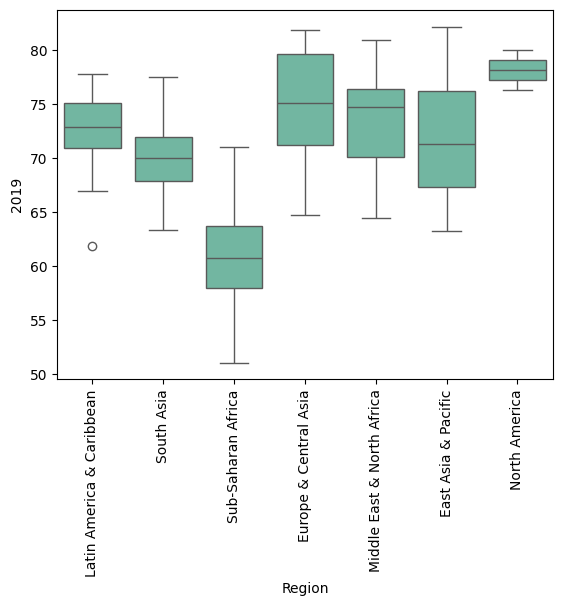

In [28]:
sns.boxplot(x='Region',y='2019',data=merged_df)
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Latin America & Caribbean'),
  Text(1, 0, 'South Asia'),
  Text(2, 0, 'Sub-Saharan Africa'),
  Text(3, 0, 'Europe & Central Asia'),
  Text(4, 0, 'Middle East & North Africa'),
  Text(5, 0, 'East Asia & Pacific'),
  Text(6, 0, 'North America')])

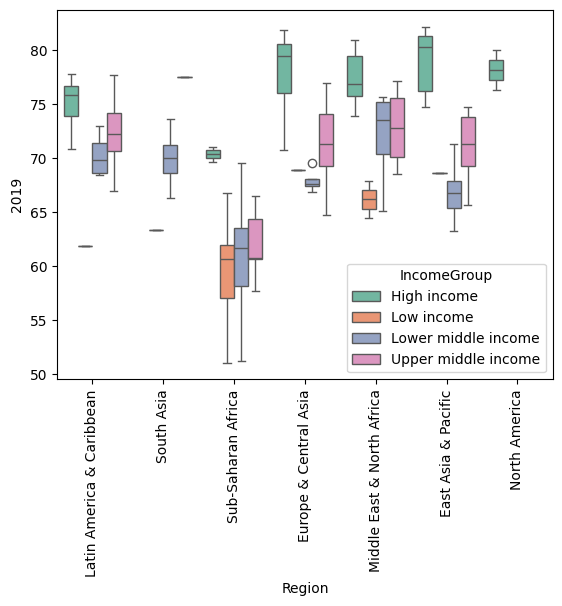

In [29]:
sns.boxplot(x='Region',y='2019',hue='IncomeGroup',data=merged_df)
plt.xticks(rotation=90)

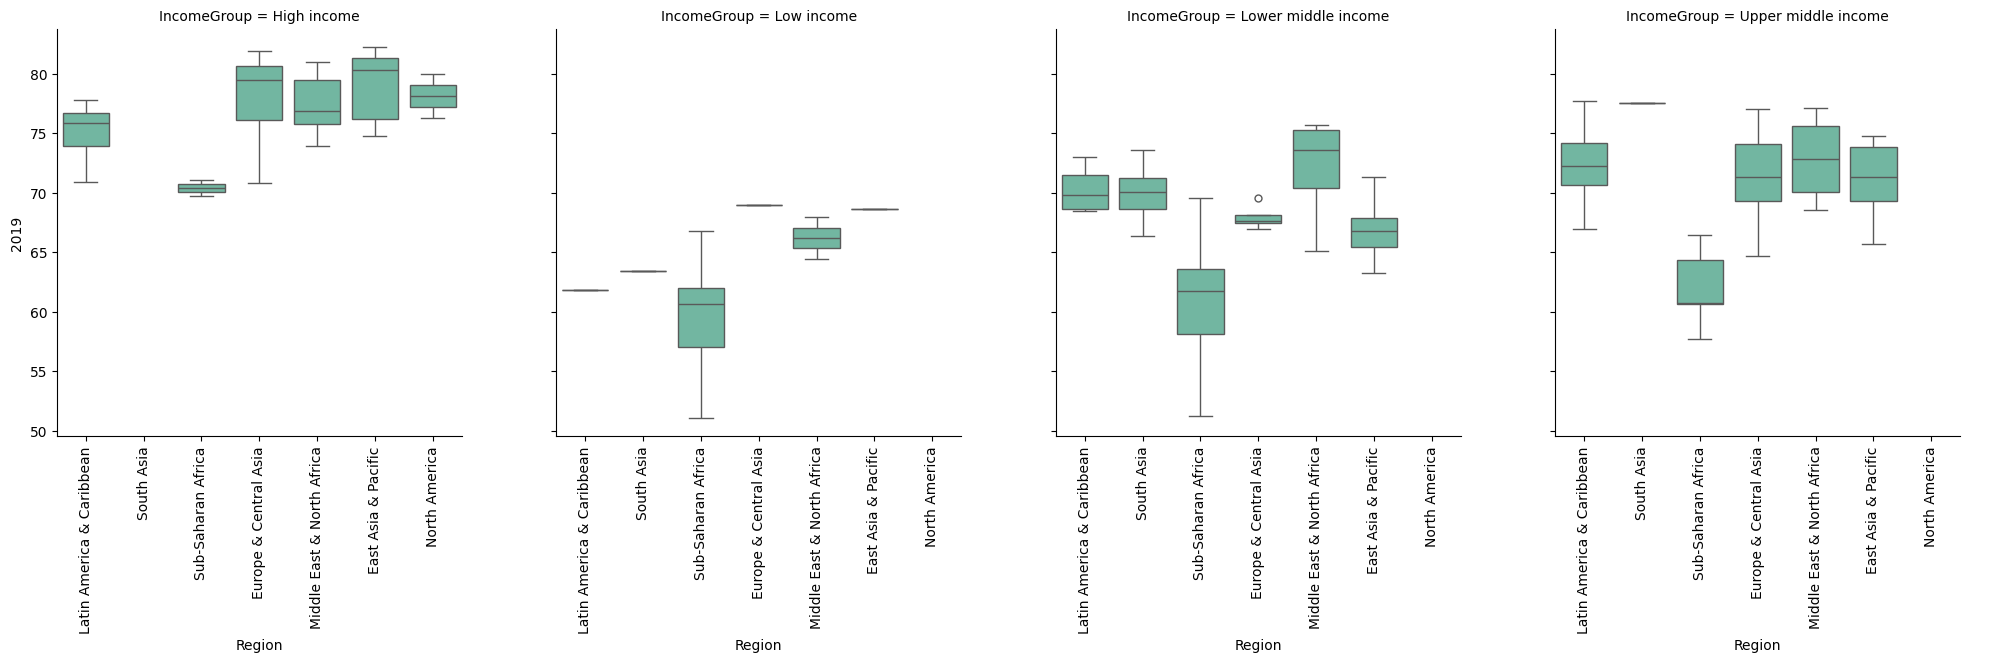

In [30]:
splot = sns.catplot(kind='box',x='Region',y='2019',col='IncomeGroup',data=merged_df);
splot.set_xticklabels(rotation=90)

# Diagramas de dispersión
 relación entre el indicador de expectativa de vida, que se ha estado ocupando, y el ingreso nacional bruto per cápita. Para ello, se utilizará el archivo GNI.csv (por sus siglas en inglés de Gross National Income) que almacena este indicador, por país, desde 1960. Los valores indican el ingreso nacional bruto, convertido a dólares estadounidenses, dividido por la población a mitad de año.

In [32]:
gni=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datos/visualizacion/GNI.csv')

In [33]:
gni.head()

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,22370.0,22450.0,23520.0,24420.0,25190.0,26250.0,26560.0,26810.0,NaN,NaN
1,Afghanistan,AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,510.0,530.0,630.0,660.0,630.0,600.0,550.0,530.0,520.0,530.0
2,Angola,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3230.0,3410.0,4170.0,4780.0,5010.0,4520.0,3770.0,3450.0,3210.0,2960.0
3,Albania,ALB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4360.0,4410.0,4360.0,4540.0,4540.0,4390.0,4320.0,4290.0,4860.0,5220.0
4,Andorra,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


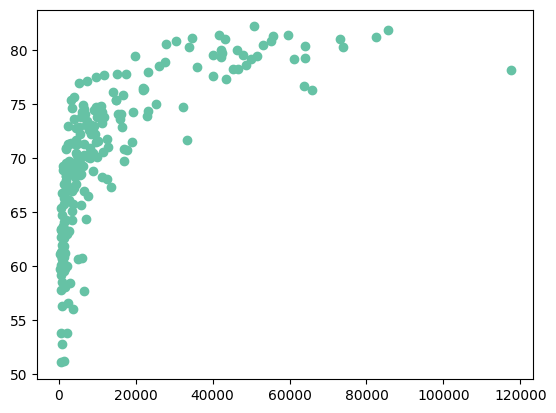

In [34]:
plt.scatter(x=gni['2019'],y=lifexp_male['2019'])

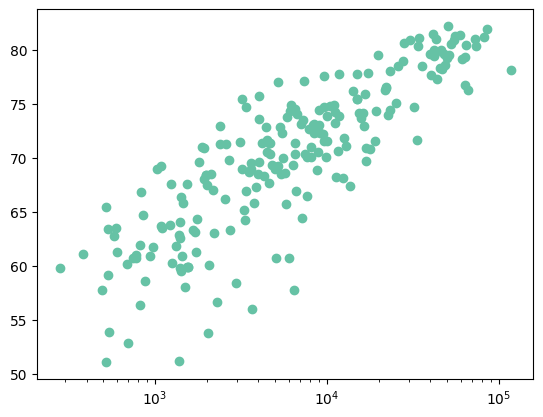

In [36]:
plt.scatter(x=gni['2019'],y=lifexp_male['2019'])
plt.xscale('log')
corr = gni['2019'].corr(lifexp_male['2019'])#correlación entre ambos datos del 2019

Aunque se podría seguir ocupando ambos dataframes de manera independiente como en el ejemplo anterior, combinémoslos en uno (merged_df) para ocupar todas las formas de graficación equivalentes estudiadas. Como los años se duplicarán por la presencia de ambos indicadores al usar la función merge(), es recomendable que se incluyan los sufijos que los diferenciarán.

In [38]:
merged_df = lifexp_male.merge(gni,on='Country Code',suffixes=('_lifexp','_gni'))

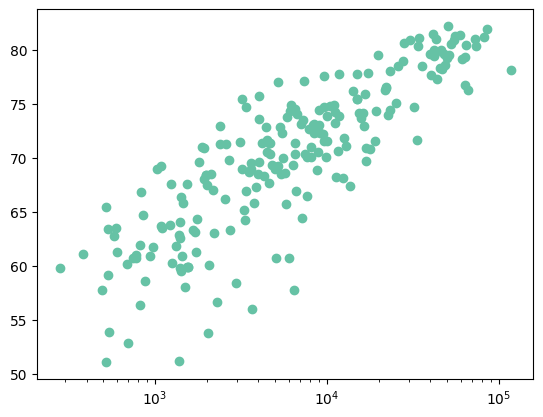

In [40]:
plt.scatter(x=merged_df['2019_gni'],y=merged_df['2019_lifexp'])
plt.xscale('log')
#o
#plt.scatter(x='2019_gni',y='2019_lifexp',data=merged_df) plt.xscale('log')

<Axes: xlabel='2019_gni', ylabel='2019_lifexp'>

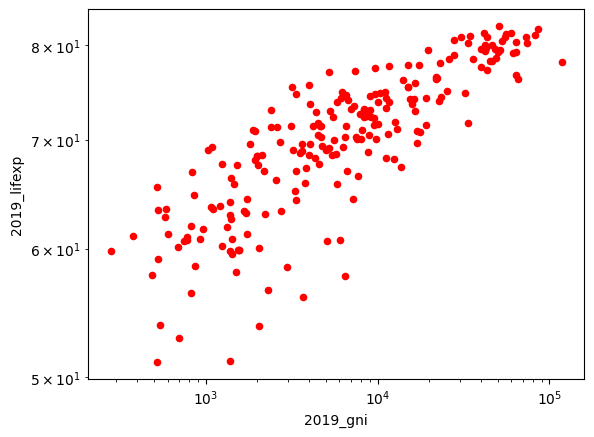

In [41]:
#merged_df.plot(kind='scatter',x='2019_gni',y='2019_lifexp',c='red',logx=True,logy=True)
#o
merged_df.plot(kind='scatter',x='2019_gni',y='2019_lifexp',c='red',logx=True,logy=True)

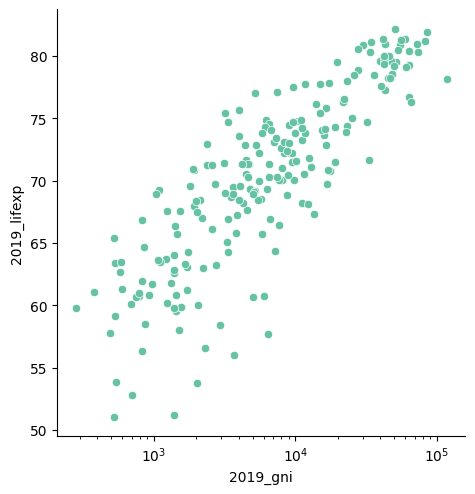

In [42]:
#splot = sns.scatterplot(x=merged_df['2019_gni'],y=merged_df['2019_lifexp'])
#splot.set(xscale='log')
#
#splot = sns.scatterplot(x='2019_gni',y='2019_lifexp',data=merged_df)
#splot.set(xscale='log')
#
splot = sns.relplot(kind='scatter',x='2019_gni',y='2019_lifexp',data=merged_df)
splot.set(xscale='log')

Como en los histogramas y boxplots, en los scatter plots también puedes separar en grupos la relación entre dos variables. Para ello, se ocupará nuevamente el dataframe metada, para combinarlo con merged_df y así poder obtener un scatter plot en el que se indique la región:

In [43]:
merged_df2 = merged_df.merge(metadata,on='Country Code')

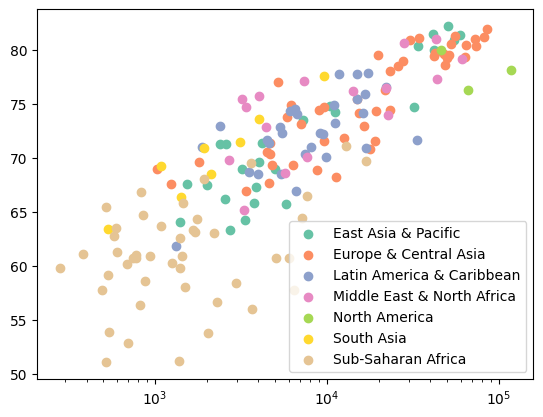

In [44]:
#para matplotlib y pandas
groups = merged_df2.groupby('Region')
for name, group in groups:
      plt.scatter(group['2019_gni'], group['2019_lifexp'], label=name)
plt.legend()
plt.xscale('log')

[None]

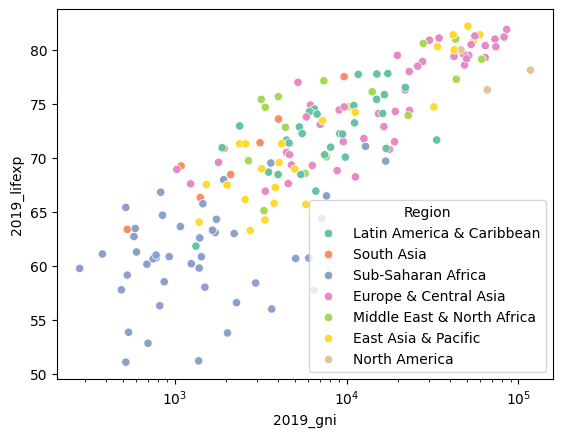

In [46]:
#seaborn
splot = sns.scatterplot(x='2019_gni',y='2019_lifexp',hue='Region',data=merged_df2)
splot.set(xscale='log')

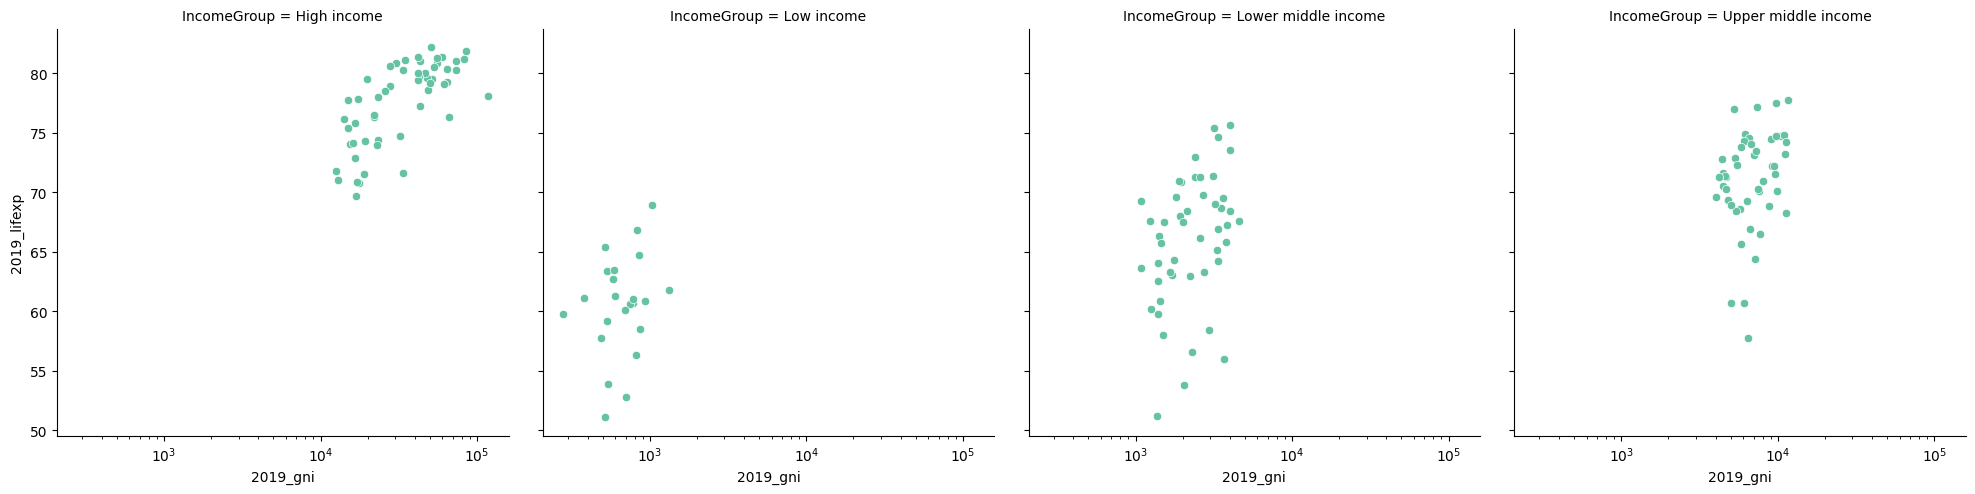

In [48]:
#La interfaz relplot permite separar los grupos en gráficos independientes,
#basta con indicarlo en el parámetro col:
splot = sns.relplot(kind='scatter',x='2019_gni',y='2019_lifexp',col='IncomeGroup',data=merged_df2)
splot.set(xscale='log')